In [ ]:
#getting the dataset
!git clone https://github.com/Franck-Dernoncourt/pubmed-rct

Cloning into 'pubmed-rct'...
remote: Enumerating objects: 33, done.
remote: Counting objects: 100% (8/8), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 33 (delta 5), reused 5 (delta 5), pack-reused 25
Unpacking objects: 100% (33/33), done.
Checking out files: 100% (13/13), done.


In [ ]:
import os
dir_path = "/content/pubmed-rct/PubMed_20k_RCT/"

for path, dir, files in os.walk(dir_path):
  file_paths = files

file_paths

['test.txt', 'train.txt', 'dev.txt']

#model_0

In [ ]:
with open(dir_path+file_paths[0],'r') as f:
  test_data = f.readlines()
with open(dir_path+file_paths[1],'r') as f:
  train_data = f.readlines()
with open(dir_path+file_paths[2],'r') as f:
  val_data = f.readlines()

In [ ]:
len(train_data)

210040

In [ ]:
def convert_into_list(f):
  abstract_list = []
  abstract_string = ''

  for line in f:
    if line.startswith("###"):
      pass
    elif line.isspace():
      abstract_string = abstract_string.splitlines()
      total_lines = len(abstract_string)
      for line_no, line in enumerate(abstract_string):
        target, text = line.split('\t')
        dic = {
            "target":target,
            "text":text,
            "line_no":line_no,
            "total_lines":total_lines
        }
        abstract_list.append(dic)
      abstract_string = ''
    else:
      abstract_string+=line

  return abstract_list



In [ ]:
test = convert_into_list(test_data)
validation = convert_into_list(val_data)
train = convert_into_list(train_data)

In [ ]:
import pandas as pd

test_df = pd.DataFrame(test)
train_df = pd.DataFrame(train)
val_df = pd.DataFrame(validation)

In [ ]:
train_df[:20]

,target,text,line_no,total_lines
0,OBJECTIVE,To investigate the efficacy of 6 weeks of dail...,0,12
1,METHODS,A total of 125 patients with primary knee OA w...,1,12
2,METHODS,Outcome measures included pain reduction and i...,2,12
3,METHODS,Pain was assessed using the visual analog pain...,3,12
4,METHODS,Secondary outcome measures included the Wester...,4,12
5,METHODS,"Serum levels of interleukin 1 ( IL-1 ) , IL-6 ...",5,12
6,RESULTS,There was a clinically relevant reduction in t...,6,12
7,RESULTS,The mean difference between treatment arms ( 9...,7,12
8,RESULTS,"Further , there was a clinically relevant redu...",8,12
9,RESULTS,These differences remained significant at 12 w...,9,12


In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
train_label = label_encoder.fit_transform(train_df['target'])
test_label = label_encoder.transform(test_df['target'])
val_label = label_encoder.transform(val_df['target'])

train_sentences = train_df['text']
validation_sentences = val_df['text']
test_sentences = test_df['text']

In [ ]:
train_label[:20], train_sentences[:20]

(array([3, 2, 2, 2, 2, 2, 4, 4, 4, 4, 4, 1, 0, 0, 3, 3, 2, 2, 2, 4]),
 0     To investigate the efficacy of 6 weeks of dail...
 1     A total of 125 patients with primary knee OA w...
 2     Outcome measures included pain reduction and i...
 3     Pain was assessed using the visual analog pain...
 4     Secondary outcome measures included the Wester...
 5     Serum levels of interleukin 1 ( IL-1 ) , IL-6 ...
 6     There was a clinically relevant reduction in t...
 7     The mean difference between treatment arms ( 9...
 8     Further , there was a clinically relevant redu...
 9     These differences remained significant at 12 w...
 10    The Outcome Measures in Rheumatology Clinical ...
 11    Low-dose oral prednisolone had both a short-te...
 12    Emotional eating is associated with overeating...
 13    Yet , empirical evidence for individual ( trai...
 14    The aim of this study was to test if attention...
 15    It was expected that emotional eating is predi...
 16    Participant

In [ ]:
labels = list(label_encoder.classes_)
labels

['BACKGROUND', 'CONCLUSIONS', 'METHODS', 'OBJECTIVE', 'RESULTS']

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

In [ ]:
model_0 = Pipeline([
    ('tfidf',TfidfVectorizer()),
    ('clfr', MultinomialNB())
])

model_0.fit(train_sentences, train_label)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clfr', MultinomialNB())])

In [ ]:
model_0.score(test_sentences, test_label)

0.7265637962502074

In [ ]:
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import accuracy_score
def create_result(y_true, y_preds):
  accuracy = accuracy_score(y_true, y_preds)
  precision, recall, fscore, _ = precision_recall_fscore_support(y_true,y_preds,average='weighted')
  dic = {
      'accuracy':accuracy,
      'precision':precision,
      'recall':recall,
      'f1':fscore
  }
  return dic

In [ ]:
preds = model_0.predict(test_sentences)
model0_result = create_result(test_label, preds)
model0_result

{'accuracy': 0.7265637962502074,
 'precision': 0.7218365936390034,
 'recall': 0.7265637962502074,
 'f1': 0.69938918556014}

#model_1

In [ ]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(sparse=False)

train_label_hot = ohe.fit_transform(train_df['target'].to_numpy().reshape(-1,1))
validation_label_hot = ohe.transform(val_df['target'].to_numpy().reshape(-1,1))
test_label_hot = ohe.transform(test_df['target'].to_numpy().reshape(-1,1))

In [ ]:
train_label_hot[:10], train_label[:10]

(array([[0., 0., 0., 1., 0.],
        [0., 0., 1., 0., 0.],
        [0., 0., 1., 0., 0.],
        [0., 0., 1., 0., 0.],
        [0., 0., 1., 0., 0.],
        [0., 0., 1., 0., 0.],
        [0., 0., 0., 0., 1.],
        [0., 0., 0., 0., 1.],
        [0., 0., 0., 0., 1.],
        [0., 0., 0., 0., 1.]]), array([3, 2, 2, 2, 2, 2, 4, 4, 4, 4]))

In [ ]:
#lets see our sentences
len_list = []
for sentence in train_sentences:
  len_list.append(len(sentence.split()))

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

tf.math.reduce_mean(len_list)

<tf.Tensor: shape=(), dtype=int32, numpy=26>

(array([2.5486e+04, 7.1477e+04, 4.8889e+04, 2.0260e+04, 7.5560e+03,
        3.4370e+03, 1.4950e+03, 7.3700e+02, 3.2800e+02, 1.6500e+02,
        8.5000e+01, 4.9000e+01, 2.0000e+01, 1.5000e+01, 9.0000e+00,
        6.0000e+00, 8.0000e+00, 8.0000e+00, 3.0000e+00, 2.0000e+00,
        3.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00, 1.0000e+00]),
 array([  1. ,  12.8,  24.6,  36.4,  48.2,  60. ,  71.8,  83.6,  95.4,
        107.2, 119. , 130.8, 142.6, 154.4, 166.2, 178. , 189.8, 201.6,
        213.4, 225.2, 237. , 248.8, 260.6, 272.4, 284.2, 296. ]),
 <a list of 25 Patch objects>)

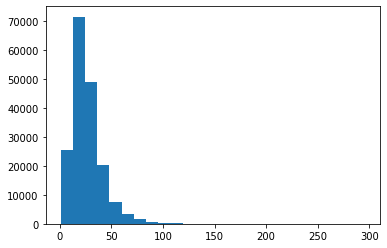

In [ ]:
plt.hist(len_list,bins=25)

In [ ]:
len_list.sort()
np.percentile(len_list,95)


55.0

In [ ]:
train_ds = tf.data.Dataset.from_tensor_slices((train_sentences, train_label_hot))
validation_ds = tf.data.Dataset.from_tensor_slices((validation_sentences, validation_label_hot))
test_ds = tf.data.Dataset.from_tensor_slices((test_sentences, test_label_hot))

train_ds = train_ds.batch(32).prefetch(tf.data.AUTOTUNE)
validation_ds = validation_ds.batch(32).prefetch(tf.data.AUTOTUNE)
test_ds = test_ds.batch(32).prefetch(tf.data.AUTOTUNE)

test_ds

<PrefetchDataset element_spec=(TensorSpec(shape=(None,), dtype=tf.string, name=None), TensorSpec(shape=(None, 5), dtype=tf.float64, name=None))>

In [ ]:
text_vectorizer = tf.keras.layers.TextVectorization(
    max_tokens=68000,
    output_mode='int',
    output_sequence_length=55
)
text_vectorizer.adapt(train_sentences)
embedding = tf.keras.layers.Embedding(
    input_dim=68000,
    output_dim=128,
    input_shape=(55,),
    mask_zero=True
)

In [ ]:
inputs = tf.keras.Input(shape=(1,),dtype=tf.string)
x = text_vectorizer(inputs)
x = embedding(x)
x = tf.keras.layers.Conv1D(64,5,padding='same',activation='relu')(x)
# x = tf.keras.layers.Conv1D(64,5,padding='same',activation='relu')(x) #not improving performance
x = tf.keras.layers.GlobalAveragePooling1D()(x)
outputs = tf.keras.layers.Dense(5,activation='softmax')(x)

model_1 = tf.keras.Model(inputs, outputs)

In [ ]:
model_1.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization (TextVec  (None, 55)               0         
 torization)                                                     
                                                                 
 embedding (Embedding)       (None, 55, 128)           8704000   
                                                                 
 conv1d (Conv1D)             (None, 55, 64)            41024     
                                                                 
 global_average_pooling1d (G  (None, 64)               0         
 lobalAveragePooling1D)                                          
                                                                 
 dense (Dense)               (None, 5)                 325   

In [ ]:
len(train_ds)

5627

In [ ]:
model_1.compile(
    optimizer= tf.keras.optimizers.Adam(),
    loss=tf.keras.losses.CategoricalCrossentropy(),
    metrics=['accuracy']
)
model_1.fit(train_ds,
            steps_per_epoch=int(0.1*len(train_ds)),
            validation_steps=int(0.1*len(validation_ds)),
            validation_data=validation_ds,
            epochs=3)


Epoch 1/3
562/562 [==============================] - 18s 9ms/step - loss: 0.9040 - accuracy: 0.6410 - val_loss: 0.6780 - val_accuracy: 0.7447
Epoch 2/3
562/562 [==============================] - 5s 9ms/step - loss: 0.6521 - accuracy: 0.7551 - val_loss: 0.6165 - val_accuracy: 0.7709
Epoch 3/3
562/562 [==============================] - 5s 8ms/step - loss: 0.6133 - accuracy: 0.7739 - val_loss: 0.5940 - val_accuracy: 0.7842


In [ ]:
preds = model_1.predict(test_sentences)
# model1_result = create_result()
preds = tf.argmax(preds, axis=1)
preds[:10]

<tf.Tensor: shape=(10,), dtype=int64, numpy=array([0, 2, 2, 4, 4, 4, 4, 0, 1, 1])>

In [ ]:
model_1.evaluate(test_sentences, test_label_hot)

942/942 [==============================] - 4s 4ms/step - loss: 0.6104 - accuracy: 0.7822


[0.6103959679603577, 0.7822465300559998]

In [ ]:
model1_result = create_result(test_label, preds)
model1_result, model0_result

({'accuracy': 0.7822465571594491,
  'precision': 0.777114364478626,
  'recall': 0.7822465571594491,
  'f1': 0.7785351274007152},
 {'accuracy': 0.7265637962502074,
  'precision': 0.7218365936390034,
  'recall': 0.7265637962502074,
  'f1': 0.69938918556014})

#model 2

In [ ]:
import random
random_sentence = random.choice(train_sentences)
random_sentence

'Desmopressin or 1-deamino-8-D-arginine vasopressin ( DDAVP ) is a synthetic analog of vasopressin .'

In [ ]:
def split_char(sentence):
  return " ".join(list(sentence))

split_char(random_sentence)

'D e s m o p r e s s i n   o r   1 - d e a m i n o - 8 - D - a r g i n i n e   v a s o p r e s s i n   (   D D A V P   )   i s   a   s y n t h e t i c   a n a l o g   o f   v a s o p r e s s i n   .'

In [ ]:
train_chars = [split_char(sentence) for sentence in train_sentences]
val_chars = [split_char(sentence) for sentence in validation_sentences]
test_chars = [ split_char(sentence) for sentence in test_sentences ]

len(train_sentences)

180040

((array([1.45323e+05, 3.31950e+04, 1.38800e+03, 1.07000e+02, 2.20000e+01,
         3.00000e+00, 2.00000e+00]),
  array([   2.        ,  209.42857143,  416.85714286,  624.28571429,
          831.71428571, 1039.14285714, 1246.57142857, 1454.        ]),
  <a list of 7 Patch objects>),
 152.006276383026)

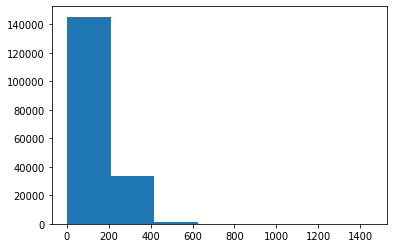

In [ ]:
char_len_list = [len(sentence) for sentence in train_sentences]
plt.hist(char_len_list, bins = 7), np.mean(char_len_list)

In [ ]:
np.percentile(char_len_list,95)

296.0

In [ ]:
val_char = tf.data.Dataset.from_tensor_slices((val_chars, validation_label_hot))
train_char = tf.data.Dataset.from_tensor_slices((train_chars, train_label_hot))
test_char = tf.data.Dataset.from_tensor_slices((test_chars, test_label_hot))

val_char = val_char.batch(32).prefetch(tf.data.AUTOTUNE)
train_char = train_char.batch(32).prefetch(tf.data.AUTOTUNE)
test_char = test_char.batch(32).prefetch(tf.data.AUTOTUNE)

In [ ]:
char_vectorizer = tf.keras.layers.TextVectorization(output_sequence_length=290)
char_vectorizer.adapt(train_chars)
vocab = char_vectorizer.get_vocabulary()


In [ ]:
len(vocab)

38

In [ ]:
char_embedding = tf.keras.layers.Embedding(
    input_dim=len(vocab),
    output_dim=128,
    input_length=290,
    mask_zero=True
)

In [ ]:
inputs = tf.keras.Input(shape=(1,),dtype=tf.string)
x = char_vectorizer(inputs)
x = char_embedding(x)
x = tf.keras.layers.Conv1D(64,5,padding='same',activation='relu')(x)
# x = tf.keras.layers.Conv1D(64,5,padding='same',activation='relu')(x)
# x = tf.keras.layers.Conv1D(64,5,padding='same',activation='relu')(x)
x = tf.keras.layers.GlobalMaxPool1D()(x)
outputs = tf.keras.layers.Dense(5,activation='softmax')(x)

model_2 = tf.keras.Model(inputs, outputs)
model_2.compile(
    loss=tf.keras.losses.CategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['accuracy']
)

In [ ]:
model_2.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (TextV  (None, 290)              0         
 ectorization)                                                   
                                                                 
 embedding_1 (Embedding)     (None, 290, 128)          4864      
                                                                 
 conv1d_1 (Conv1D)           (None, 290, 64)           41024     
                                                                 
 global_max_pooling1d (Globa  (None, 64)               0         
 lMaxPooling1D)                                                  
                                                                 
 dense_1 (Dense)             (None, 5)                 325 

In [ ]:
model_2.fit(train_char,
            steps_per_epoch=int(0.2*len(train_char)),
            validation_data=val_char,
            validation_steps=int(0.1*len(val_char)),
            epochs=4)

Epoch 1/4
1125/1125 [==============================] - 7s 6ms/step - loss: 0.9805 - accuracy: 0.6072 - val_loss: 0.8181 - val_accuracy: 0.6895
Epoch 2/4
1125/1125 [==============================] - 6s 6ms/step - loss: 0.7930 - accuracy: 0.6942 - val_loss: 0.7449 - val_accuracy: 0.7108
Epoch 3/4
1125/1125 [==============================] - 7s 6ms/step - loss: 0.7531 - accuracy: 0.7096 - val_loss: 0.7250 - val_accuracy: 0.7214
Epoch 4/4
1125/1125 [==============================] - 7s 6ms/step - loss: 0.7185 - accuracy: 0.7251 - val_loss: 0.6947 - val_accuracy: 0.7407


In [ ]:
model_2.evaluate(test_char)

942/942 [==============================] - 4s 4ms/step - loss: 0.7123 - accuracy: 0.7322


[0.7122673392295837, 0.732171893119812]

In [ ]:
preds = model_2.predict(test_chars)
preds = tf.argmax(preds, axis=1)

model2_result = create_result(test_label,preds)

model2_result, model1_result, model0_result


({'accuracy': 0.7321718931475029,
  'precision': 0.7359240461266389,
  'recall': 0.7321718931475029,
  'f1': 0.7292272775272353},
 {'accuracy': 0.7822465571594491,
  'precision': 0.777114364478626,
  'recall': 0.7822465571594491,
  'f1': 0.7785351274007152},
 {'accuracy': 0.7265637962502074,
  'precision': 0.7218365936390034,
  'recall': 0.7265637962502074,
  'f1': 0.69938918556014})

#model 3

In [ ]:
import tensorflow_hub as hub

use = hub.KerasLayer('https://tfhub.dev/google/universal-sentence-encoder/4')

token_inputs = tf.keras.Input(shape=[], dtype=tf.string)
use_layer = use(token_inputs)
token_outputs = tf.keras.layers.Dense(128, activation='relu')(use_layer)
token_model = tf.keras.Model(token_inputs, token_outputs, name='tokens')

char_inputs = tf.keras.Input(shape=(1,), dtype=tf.string)
char_v = char_vectorizer(char_inputs)
char_e = char_embedding(char_v)
lstm = tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(24))(char_e)
char_lstm_model = tf.keras.Model(char_inputs, lstm, name='embeddings')

inputs = tf.keras.layers.Concatenate(name='hybrid')([token_model.output, char_lstm_model.output])
x = tf.keras.layers.Dropout(0.5)(inputs)
x = tf.keras.layers.Dense(128, activation='relu')(x)
x = tf.keras.layers.Dropout(0.5)(x)
output_layer = tf.keras.layers.Dense(5, activation='softmax')(x)

model_3 = tf.keras.Model(inputs=[token_model.input, char_lstm_model.input], outputs=output_layer)

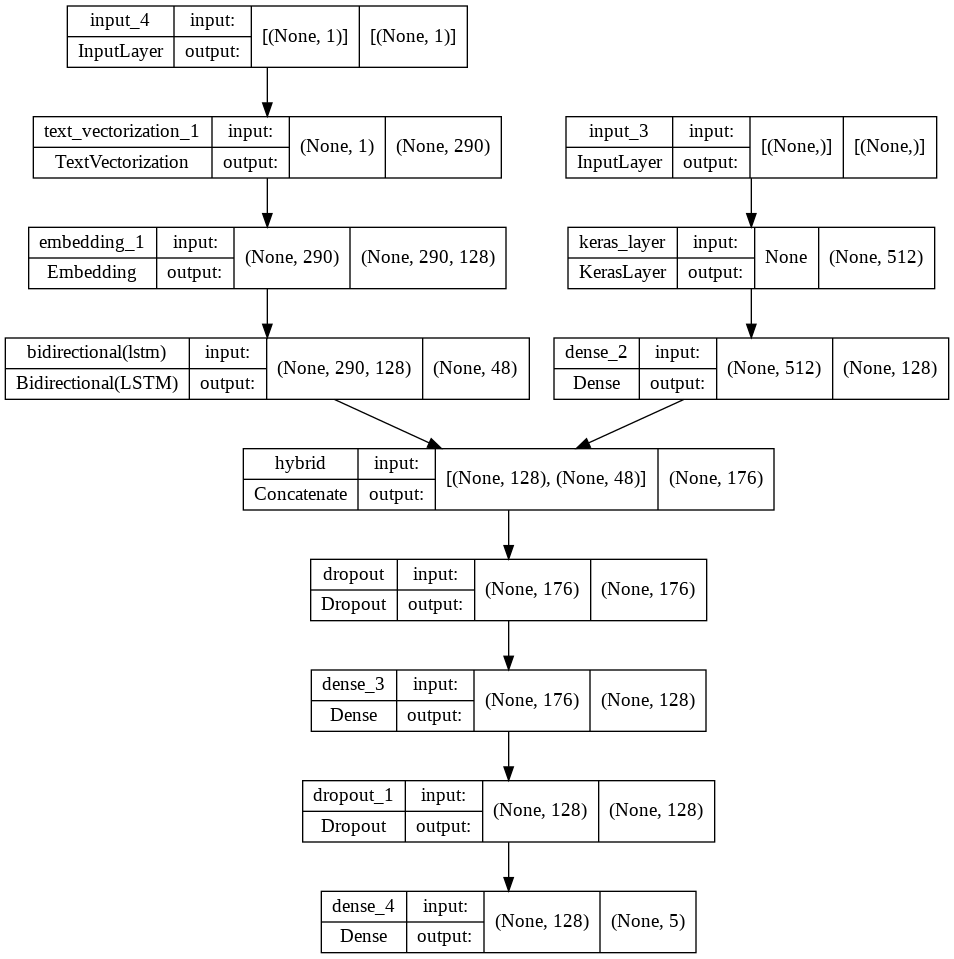

In [ ]:
tf.keras.utils.plot_model(model_3, show_shapes=True)

In [ ]:
train_inputs = tf.data.Dataset.from_tensor_slices((train_sentences, train_chars))
train_labels = tf.data.Dataset.from_tensor_slices(train_label_hot)
train_ds = tf.data.Dataset.zip((train_inputs, train_labels)).batch(32).prefetch(tf.data.AUTOTUNE)

val_inputs = tf.data.Dataset.from_tensor_slices((validation_sentences, val_chars))
val_labels = tf.data.Dataset.from_tensor_slices(validation_label_hot)
val_ds = tf.data.Dataset.zip((val_inputs, val_labels)).batch(32).prefetch(tf.data.AUTOTUNE)

test_inputs = tf.data.Dataset.from_tensor_slices((test_sentences, test_chars))
test_labels = tf.data.Dataset.from_tensor_slices(test_label_hot)
test_ds = tf.data.Dataset.zip((test_inputs, test_labels)).batch(32).prefetch(tf.data.AUTOTUNE)

In [ ]:
test_inputs

<TensorSliceDataset element_spec=(TensorSpec(shape=(), dtype=tf.string, name=None), TensorSpec(shape=(), dtype=tf.string, name=None))>

In [ ]:
import tensorflow_datasets as tfds

tfds.benchmark(train_ds)

  0%|          | 1/5627 [00:00<?, ?it/s]


************ Summary ************

Examples/sec (First included) 3706.83 ex/sec (total: 5627 ex, 1.52 sec)
Examples/sec (First only) 36.96 ex/sec (total: 1 ex, 0.03 sec)
Examples/sec (First excluded) 3773.43 ex/sec (total: 5626 ex, 1.49 sec)


,duration,num_examples,avg
first+lasts,1.518008,5627,3706.831467
first,0.027056,1,36.960161
lasts,1.490952,5626,3773.428265


In [ ]:
model_3.compile(
    loss=tf.keras.losses.CategoricalCrossentropy(), 
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['accuracy']
)

model_3.fit(train_ds,
            steps_per_epoch=int(0.1*len(train_ds)),
            validation_data=val_ds,
            validation_steps=int(0.1*len(validation_ds)),
            epochs=5)

Epoch 1/5
562/562 [==============================] - 36s 44ms/step - loss: 0.9490 - accuracy: 0.6260 - val_loss: 0.7569 - val_accuracy: 0.7078
Epoch 2/5
562/562 [==============================] - 22s 40ms/step - loss: 0.7697 - accuracy: 0.7048 - val_loss: 0.6895 - val_accuracy: 0.7334
Epoch 3/5
562/562 [==============================] - 22s 40ms/step - loss: 0.7448 - accuracy: 0.7115 - val_loss: 0.6703 - val_accuracy: 0.7430
Epoch 4/5
562/562 [==============================] - 24s 43ms/step - loss: 0.7218 - accuracy: 0.7287 - val_loss: 0.6443 - val_accuracy: 0.7560
Epoch 5/5
562/562 [==============================] - 23s 41ms/step - loss: 0.7103 - accuracy: 0.7311 - val_loss: 0.6358 - val_accuracy: 0.7610


In [ ]:
preds = model_3.predict(test_ds)
preds = tf.argmax(preds, axis=1)

model3_result = create_result(test_label, preds)

model3_result,model2_result,model1_result,model0_result

({'accuracy': 0.7527127924340468,
  'precision': 0.7514341935702958,
  'recall': 0.7527127924340468,
  'f1': 0.7484488009312572},
 {'accuracy': 0.7321718931475029,
  'precision': 0.7359240461266389,
  'recall': 0.7321718931475029,
  'f1': 0.7292272775272353},
 {'accuracy': 0.7822465571594491,
  'precision': 0.777114364478626,
  'recall': 0.7822465571594491,
  'f1': 0.7785351274007152},
 {'accuracy': 0.7265637962502074,
  'precision': 0.7218365936390034,
  'recall': 0.7265637962502074,
  'f1': 0.69938918556014})

# final_model

In [ ]:
train_df


,target,text,line_no,total_lines
0,OBJECTIVE,To investigate the efficacy of 6 weeks of dail...,0,12
1,METHODS,A total of 125 patients with primary knee OA w...,1,12
2,METHODS,Outcome measures included pain reduction and i...,2,12
3,METHODS,Pain was assessed using the visual analog pain...,3,12
4,METHODS,Secondary outcome measures included the Wester...,4,12
...,...,...,...,...
180035,RESULTS,For the absolute change in percent atheroma vo...,7,12
180036,RESULTS,"For PAV , a significantly greater percentage o...",8,12
180037,RESULTS,Both strategies had acceptable side effect pro...,9,12
180038,CONCLUSIONS,"Compared with standard statin monotherapy , th...",10,12


In [ ]:
train_line_no = train_df['line_no']

(array([4.5000e+04, 4.4941e+04, 4.2383e+04, 2.9914e+04, 1.2840e+04,
        3.8000e+03, 9.1000e+02, 2.0000e+02, 4.3000e+01, 9.0000e+00]),
 array([ 0.,  3.,  6.,  9., 12., 15., 18., 21., 24., 27., 30.]),
 <a list of 10 Patch objects>)

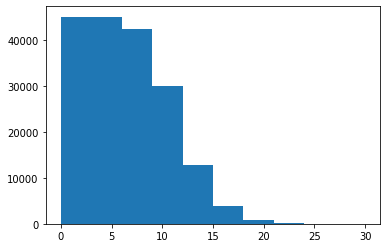

In [ ]:
plt.hist(train_line_no)

In [ ]:
train_ln = tf.one_hot(train_df['line_no'], depth=15)
val_ln = tf.one_hot(val_df['line_no'], depth=15)
test_ln = tf.one_hot(test_df['line_no'], depth=15)

In [ ]:
tl = train_df['total_lines']

(array([ 1393., 23102., 67507., 40551., 32807., 11026.,  2051.,  1223.,
          291.,    89.]),
 array([ 4. ,  6.7,  9.4, 12.1, 14.8, 17.5, 20.2, 22.9, 25.6, 28.3, 31. ]),
 <a list of 10 Patch objects>)

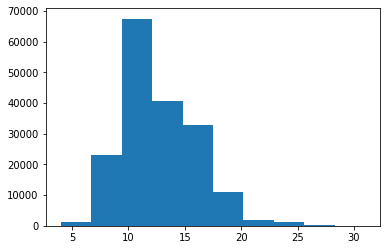

In [ ]:
plt.hist(tl)

In [ ]:
np.percentile(tl, 95)

19.0

In [ ]:
train_tl = tf.one_hot(train_df['total_lines'], depth=20)
val_tl = tf.one_hot(val_df['total_lines'], depth=20)
test_tl = tf.one_hot(test_df['total_lines'], depth=20)

In [ ]:
train_ln

<tf.Tensor: shape=(180040, 15), dtype=float32, numpy=
array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)>

#creating the model

In [ ]:
ln_inputs = tf.keras.Input(shape=(15,), dtype=tf.float32, name='ln')
ln_outputs = tf.keras.layers.Dense(128, activation='relu')(ln_inputs)
ln_model = tf.keras.Model(ln_inputs, ln_outputs)

tl_inputs = tf.keras.Input(shape=(20,), dtype=tf.float32, name='tl')
tl_outputs = tf.keras.layers.Dense(128, activation='relu')(tl_inputs)
tl_model = tf.keras.Model(tl_inputs, tl_outputs)

token_inputs = tf.keras.Input(shape=(1,),dtype=tf.string, name='token')
x = text_vectorizer(token_inputs)
x = embedding(x)
x = tf.keras.layers.Conv1D(64,5,padding='same',activation='relu')(x)
x = tf.keras.layers.GlobalAveragePooling1D()(x)
token_outputs = tf.keras.layers.Dense(128, activation='relu')(x)
token_model = tf.keras.Model(token_inputs, token_outputs)

char_inputs = tf.keras.Input(shape=(1,), dtype=tf.string, name='char')
char_v = char_vectorizer(char_inputs)
char_e = char_embedding(char_v)
char_outputs = tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64))(char_e)
char_model = tf.keras.Model(char_inputs, char_outputs)

token_char_layer = tf.keras.layers.Concatenate()([token_model.output, char_model.output])
d1 = tf.keras.layers.Dropout(0.5)(token_char_layer)
y = tf.keras.layers.Dense(256, activation='relu')(d1)
d2 = tf.keras.layers.Dropout(0.5)(y)

ln_tl_layer = tf.keras.layers.Concatenate()([ln_model.output, tl_model.output])
token_char_ln_tl_layer = tf.keras.layers.Concatenate()([d2, ln_tl_layer])
z = tf.keras.layers.Dense(128, activation='relu')(token_char_ln_tl_layer)
outputs = tf.keras.layers.Dense(5, activation='softmax')(z)

final_model_2 = tf.keras.Model(inputs=[token_model.input, char_model.input, ln_model.input, tl_model.input], outputs=outputs)

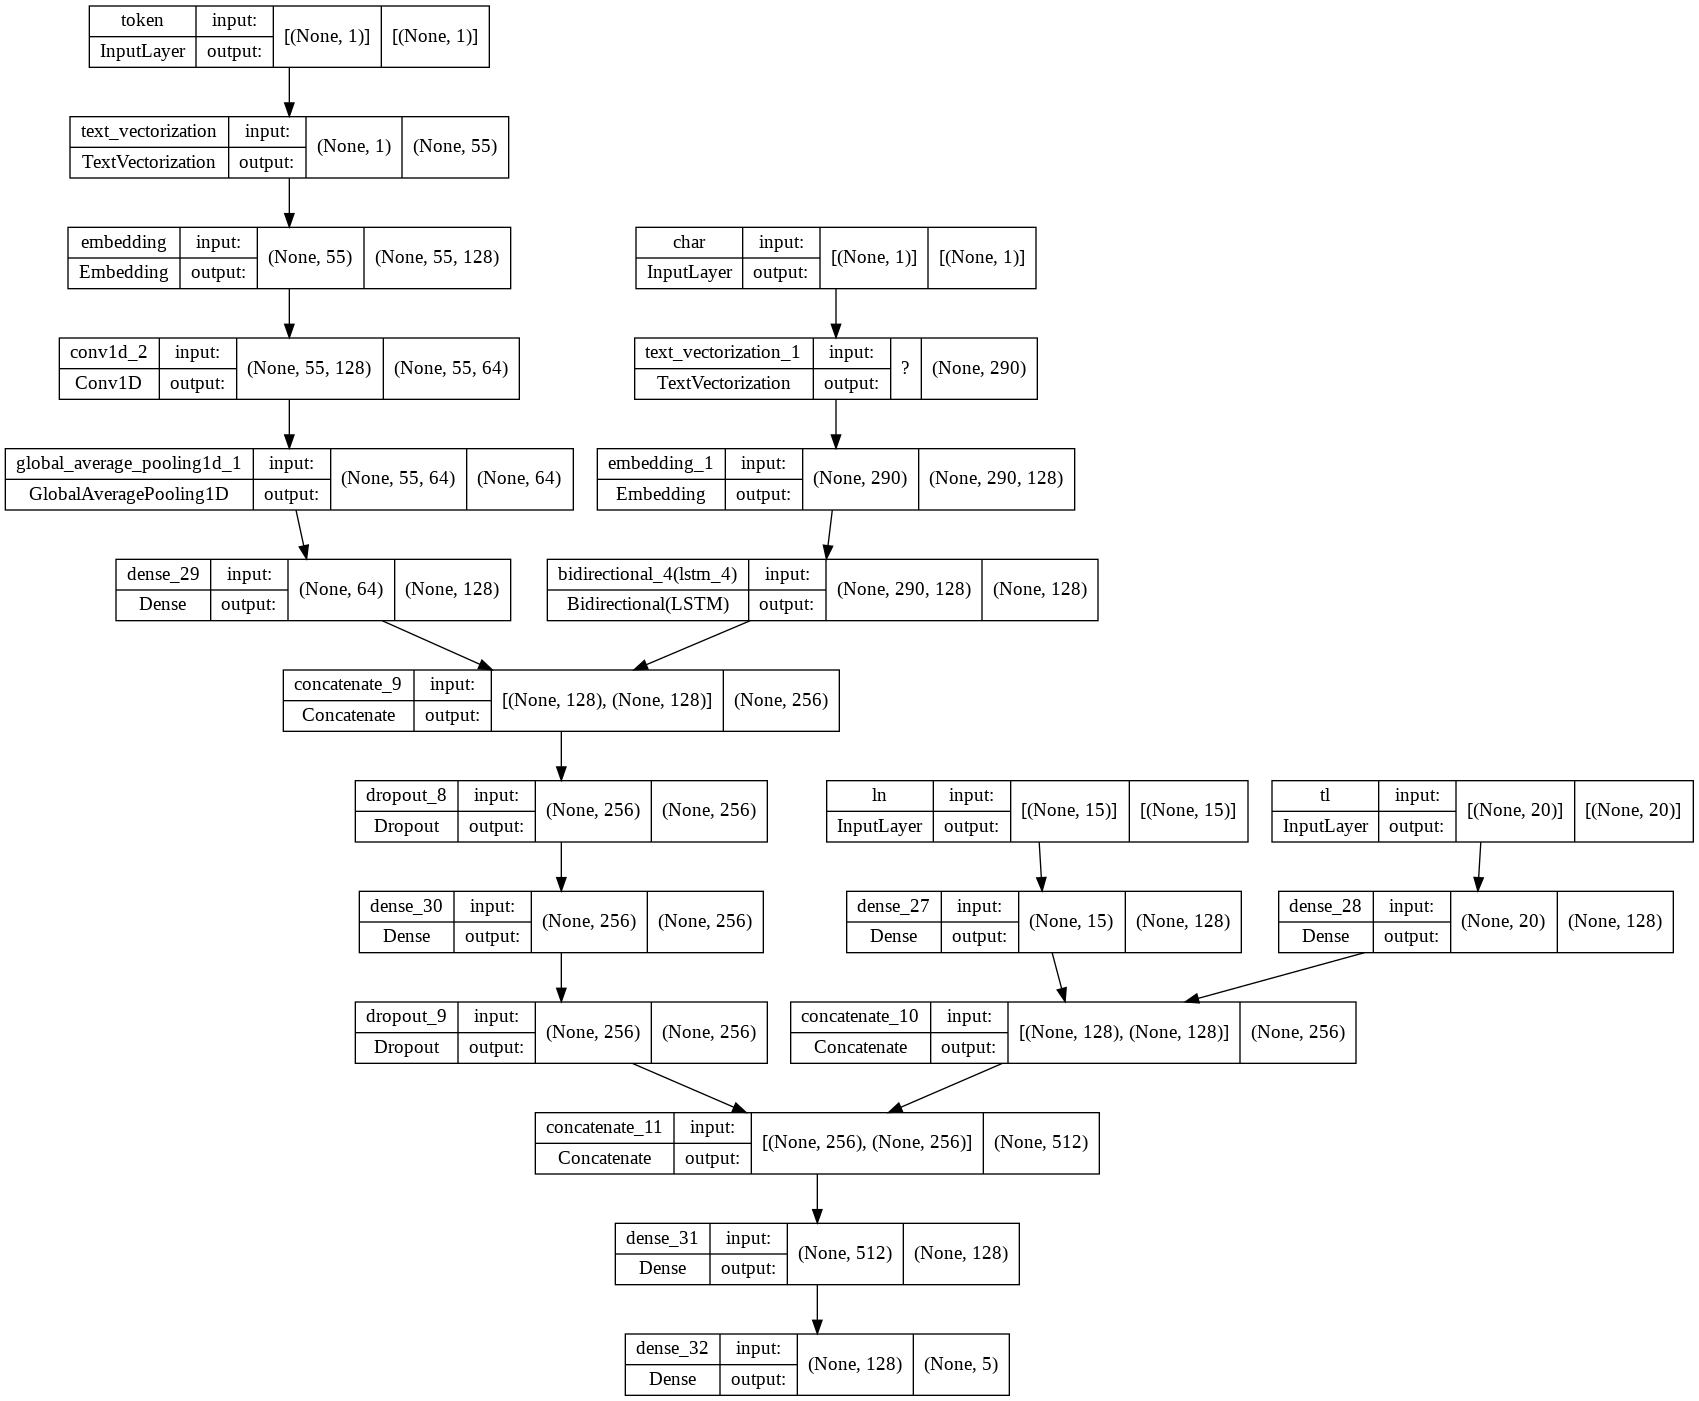

In [ ]:
tf.keras.utils.plot_model(final_model_2, show_shapes=True)

In [ ]:
train_inputs = tf.data.Dataset.from_tensor_slices((train_sentences,train_chars, train_ln, train_tl))
train_labels = tf.data.Dataset.from_tensor_slices(train_label_hot)
train = tf.data.Dataset.zip((train_inputs, train_labels)).batch(32).prefetch(tf.data.AUTOTUNE)

val_inputs = tf.data.Dataset.from_tensor_slices((validation_sentences,val_chars, val_ln, val_tl))
val_labels = tf.data.Dataset.from_tensor_slices(validation_label_hot)
val = tf.data.Dataset.zip((val_inputs, val_labels)).batch(32).prefetch(tf.data.AUTOTUNE)

test_inputs = tf.data.Dataset.from_tensor_slices((test_sentences,test_chars, test_ln, test_tl))
test_labels = tf.data.Dataset.from_tensor_slices(test_label_hot)
test = tf.data.Dataset.zip((test_inputs, test_labels)).batch(32).prefetch(tf.data.AUTOTUNE)

In [ ]:
final_model_2.compile(
    loss=tf.keras.losses.CategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['accuracy']
)

final_model_2.fit(train, steps_per_epoch=int(0.1*len(train)), validation_data=val,validation_steps=int(0.1*len(val)), epochs=5)

Epoch 1/5
562/562 [==============================] - 31s 42ms/step - loss: 0.5056 - accuracy: 0.8048 - val_loss: 0.4080 - val_accuracy: 0.8474
Epoch 2/5
562/562 [==============================] - 29s 51ms/step - loss: 0.3396 - accuracy: 0.8727 - val_loss: 0.3766 - val_accuracy: 0.8511
Epoch 3/5
562/562 [==============================] - 23s 40ms/step - loss: 0.3200 - accuracy: 0.8791 - val_loss: 0.3545 - val_accuracy: 0.8554
Epoch 4/5
562/562 [==============================] - 21s 37ms/step - loss: 0.3761 - accuracy: 0.8622 - val_loss: 0.3411 - val_accuracy: 0.8690
Epoch 5/5
562/562 [==============================] - 20s 36ms/step - loss: 0.3591 - accuracy: 0.8670 - val_loss: 0.3234 - val_accuracy: 0.8790


In [ ]:
final_model_2.evaluate(test)

942/942 [==============================] - 18s 19ms/step - loss: 0.3296 - accuracy: 0.8754


[0.32956433296203613, 0.8753608465194702]